<a href="https://colab.research.google.com/github/BrouthenKamel/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing needed modules


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [7]:
data_url = "https://drive.google.com/file/d/1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT/view?usp=share_link"
data_path = "/content/text_topics.csv"

In [8]:
data = pd.read_csv(data_path)

### Discovering the dataset

In [9]:
data.head()

,text,date,topics,id
0,Barbara Bailey is the queen of broadcast news ...,2020-09-04,['film_tv_&_video' 'news_&_social_concern'],1301943102094139393
1,start the 20-21 school year off POSITIVE! let’...,2020-09-05,['diaries_&_daily_life' 'youth_&_student_life'],1302275052256342017
2,Worth watching at least the 1st 10mins if I wa...,2020-09-06,['film_tv_&_video' 'news_&_social_concern'],1302450647422259205
3,There s regular people and then there s {@Bail...,2020-09-06,['celebrity_&_pop_culture'],1302452496011595776
4,"Up with new grace, truly sorry on behalf of {@...",2020-09-06,['celebrity_&_pop_culture' 'fitness_&_health' ...,1302479114469867520


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1505 non-null   object
 1   date    1505 non-null   object
 2   topics  1505 non-null   object
 3   id      1505 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 47.2+ KB


### Exploring the features

In [11]:
columns = data.columns
columns

Index(['text', 'date', 'topics', 'id'], dtype='object')

In [12]:
data['topics'].unique()

array(["['film_tv_&_video' 'news_&_social_concern']",
       "['diaries_&_daily_life' 'youth_&_student_life']",
       "['celebrity_&_pop_culture']",
       "['celebrity_&_pop_culture' 'fitness_&_health' 'news_&_social_concern']",
       "['news_&_social_concern' 'sports']", "['film_tv_&_video']",
       "['arts_&_culture' 'learning_&_educational']",
       "['business_&_entrepreneurs' 'fashion_&_style' 'other_hobbies']",
       "['celebrity_&_pop_culture' 'music']",
       "['diaries_&_daily_life' 'news_&_social_concern' 'other_hobbies']",
       "['business_&_entrepreneurs' 'other_hobbies']", "['sports']",
       "['arts_&_culture' 'fashion_&_style']",
       "['diaries_&_daily_life' 'news_&_social_concern']",
       "['diaries_&_daily_life']",
       "['celebrity_&_pop_culture' 'film_tv_&_video']",
       "['gaming' 'sports']", "['business_&_entrepreneurs']", "['music']",
       "['diaries_&_daily_life' 'fashion_&_style']",
       "['celebrity_&_pop_culture' 'news_&_social_concern']

### Constructing the target vector

In [13]:
labels = []

In [14]:
for label in data['topics'].values:
  label_string = label[1:-1].replace('\n', '')
  #print(label_string)
  label_list = [ category[1:-1] for category in label_string.split() ]
  labels.append(label_list)

In [15]:
len(labels)

1505

In [16]:
frequencies = dict()
for label_list in labels:
  for label in label_list:
    if label not in frequencies.keys():
      frequencies[label] = 1
    else:
      frequencies[label] += 1

In [17]:
frequencies = dict(sorted(frequencies.items(), key=lambda x: x[1], reverse=True))

In [18]:
frequencies

{'sports': 532,
 'music': 362,
 'news_&_social_concern': 289,
 'film_tv_&_video': 231,
 'celebrity_&_pop_culture': 210,
 'diaries_&_daily_life': 135,
 'business_&_entrepreneurs': 80,
 'other_hobbies': 70,
 'science_&_technology': 65,
 'gaming': 56,
 'relationships': 55,
 'fitness_&_health': 44,
 'arts_&_culture': 42,
 'fashion_&_style': 33,
 'family': 30,
 'learning_&_educational': 23,
 'food_&_dining': 22,
 'travel_&_adventure': 14,
 'youth_&_student_life': 11}

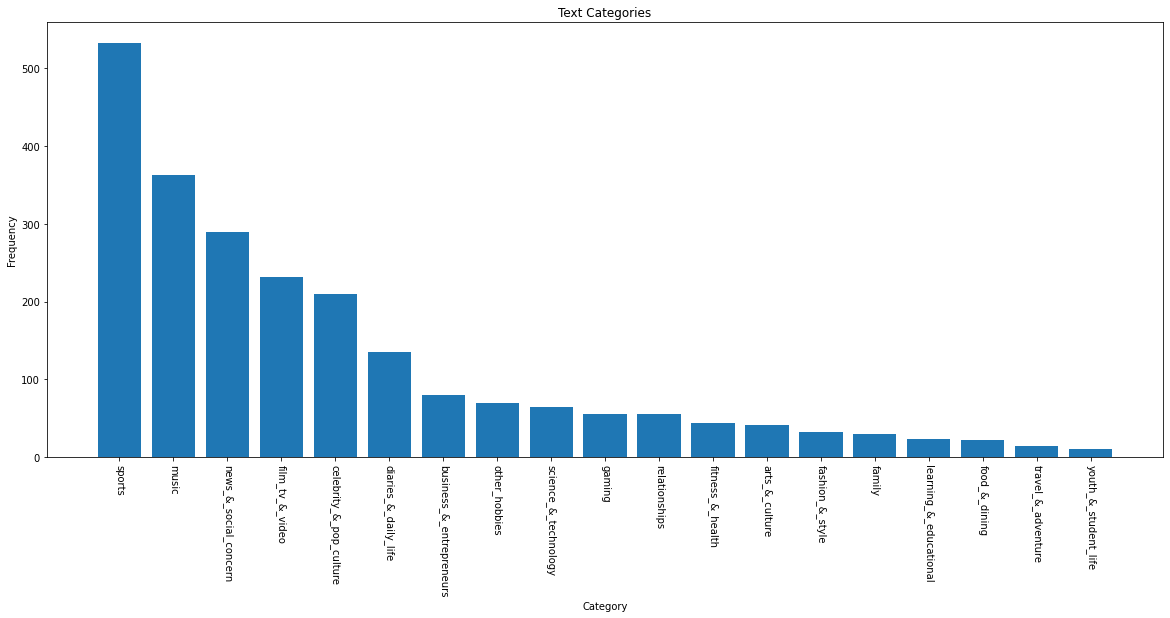

In [19]:
plt.figure(figsize=(20, 8))

plt.bar(frequencies.keys(), frequencies.values(), width=0.8)

plt.title('Text Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.xticks(rotation=-90)

plt.show()

In [20]:
topics_columns = dict()

for category in frequencies.keys():
  topic_column = []
  for data_point in labels:
    if category in data_point:
      topic_column.append(1)
    else:
      topic_column.append(0)
  topics_columns[category] = topic_column

In [21]:
topics_columns

{'sports': [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,


In [22]:
for category in frequencies.keys():
  data[category] = topics_columns[category]

In [23]:
data.columns

Index(['text', 'date', 'topics', 'id', 'sports', 'music',
       'news_&_social_concern', 'film_tv_&_video', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'business_&_entrepreneurs', 'other_hobbies',
       'science_&_technology', 'gaming', 'relationships', 'fitness_&_health',
       'arts_&_culture', 'fashion_&_style', 'family', 'learning_&_educational',
       'food_&_dining', 'travel_&_adventure', 'youth_&_student_life'],
      dtype='object')

### The new dataset

In [24]:
dataset = data.drop(columns = ['date', 'topics', 'id'] )

In [25]:
dataset

,text,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,Barbara Bailey is the queen of broadcast news ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,start the 20-21 school year off POSITIVE! let’...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Worth watching at least the 1st 10mins if I wa...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,There s regular people and then there s {@Bail...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Up with new grace, truly sorry on behalf of {@...",0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Why don t I like {@James Corden@} #JamesCorden...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,HATS off to {@Jim Cantore@} and {@The Weather ...,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,The truth is the love is real..Even if everyon...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,HMU for Quality Assured Results; #essay due; #...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Data cleaning

In [26]:
dataset['text'].sample(n=10).values.tolist()

['Potential new champion crowned tonight. Legacy defining day for a few stars and all the talk this morning is  about Scott Foster. This clown shouldn’t be employed and somehow is the head ref in the most important game of the season, clean it up {@NBA@} . #NBA #NBAFinals',
 'CHEAPEST PRICE ONLINE Check out CYCLOPS X-Men The Movie James Marsden Action Figure Toy Biz 2000 w/ Jean Grey #ToyBiz {{URL}} via {{USERNAME}}',
 'Vamosssssssssssssssssss Rafaaaaaaaaaaaaaaaaaaaa...  12th time the champion at {@Barcelona Open Banc Sabadell@} ...  Take a bow my warrior king {@Rafa Nadal@} ...  Longest best of 3 set Roller Coaster match of the year with the highest quality...❤  Long live the King...  #VamosRafa #BarcelonaOpen',
 'Fun fact ✨ - When the Women’s {@Team USA@} basketball team plays #japan for the gold medal tonight, it will be a rematch of the 1st women’s Olympic #basketball game in history, which took place in Montreal in 1976. #Olympics #TeamUSA ',
 'B1G Win and Ohio State is in {{USERN

In [27]:
import re
import string

In [28]:
def remove_tag(text):
    url = re.compile(r"({.*?}|\{\{.*?\}\})")
    return url.sub(r"", text)

In [29]:
dataset['clean_text'] = dataset["text"].apply(remove_tag)

In [30]:
dataset['clean_text'].sample(n=10).values.tolist()

['Stay safe everyone.  GOD BLESS US!  #SB19',
 '.  said  wearing a mask is now a choice, if people want to, sure go ahead.  The Biden administration  didn t even know the CDC was going to make this announcement.   #MediaBuzz',
 'Charm City Kings is . S/o  & the rest of the Cast Members.  Great Production : Will Smith & ',
 'GREAT Main Event GREAT SHOW THANK YOU  THANK YOU } *clapp clapp clapp* RIP #BackForTheAttack',
 'Unlocking the power of Scotland s rural areas with 5G - } #5G  CC: } }',
 'Talking the Blues, Manchester City (a) & end of season report. The bluntest assessment of what is required to make us successful. Change the culture by changing the leadership of the club. Otherwise we are wasting our time. } } ',
 '#MapOfTheSoulOne_D1 #MapOfTheSoulOne_D2 this was the best concert I have ever been to ... I’ve never seen bts concert in person but this made me feel like I was part of that ARMY ocean. The performances were incredible. I will never forget this   }',
 'Álvaro Cervera\x

In [31]:
dataset[["text", "clean_text"]].sample(n=1).values.tolist()

[['The good times become great memories. The bad times become great lessons.  TuloyAngLigaya SaLOUDRE  #LouDre {{USERNAME}} {{USERNAME}}',
  'The good times become great memories. The bad times become great lessons.  TuloyAngLigaya SaLOUDRE  #LouDre } }']]

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

In [34]:
dataset['clean_text'] = dataset["clean_text"].apply(remove_punct)

In [35]:
dataset[["clean_text"]].sample(n=3).values.tolist()

[['So excited for what s coming up next  GRATEFUL TO HANBIN  DearBI  비아이와아이디의첫번째봄 '],
 ['The OPEN Daily SouthLA  Featuring   la losangeles'],
 ['VwithSudheer  don t know why lots of sites gave mixed reviews Movie lived to the hypeI am especially happy that your role is not dummy as u balance nani s act very well']]

In [36]:
dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')

<ipython-input-36-f0fe9302765c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')


In [37]:
dataset["clean_text"].sample(n=2).values

array(['Why isn’t Bittersweet Poetry on Apple Music   ☹️',
       'Aj and the Queen was so beautiful thank you  I thought I couldn’t love you any more but momma you proved me wrong honey ❤️'],
      dtype=object)

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [41]:
dataset['reduced_text'] = dataset["clean_text"].apply(remove_stopwords)

In [42]:
dataset["reduced_text"].sample(n=4).values

array(['finally finished ff14 amazing ride aar shadowbringers story’s characters best experienced gaming i’m glad y’all got back thank',
       'im happy bought tickets favorite band finally get see next year bless spotify presale',
       'finally cricket sunshine cloud sky glorious today hunslet nelson cricket club',
       'want everyone chance win words yet play match match noobs pros match match get killed players crouch spamming jumping walls things need use claw elite controllers lying'],
      dtype=object)

In [43]:
dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')

<ipython-input-43-c0916d6bb42c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')


In [44]:
dataset['clean_text']

0       barbara bailey queen broadcast news central ea...
1       start  school year positive lets start thread ...
2       worth watching least st mins minister love  of...
3                         regular people queen everything
4       new grace truly sorry behalf dont endorse bad ...
                              ...                        
1500                 like jamescorden someone help figure
1501    hats team field tracking hurricaneida keeping ...
1502    truth love realeven everyone gangs yougod isnt...
1503    hmu quality assured results essay due pay writ...
1504    thinking everyone idas path friends please sta...
Name: clean_text, Length: 1505, dtype: object

### Check the vocabulary

In [45]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(dataset["clean_text"])

In [46]:
len(counter)

7371

In [ ]:
counter.most_common(30)

### Exploring statistical insights

In [160]:
X = dataset["clean_text"]

In [161]:
y = dataset.drop(columns = ['reduced_text', 'clean_text', 'text'])

In [163]:
y

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [166]:
category_frequency = y.sum(axis=0)

In [170]:
category_frequency[category_frequency > 200].index

Index(['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture'],
      dtype='object')

In [171]:
high_freq_columns = ['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture']

In [172]:
y_high_freq = y[high_freq_columns]

In [173]:
y_high_freq

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture
0,0,0,1,1,0
1,0,0,0,0,0
2,0,0,1,1,0
3,0,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
1500,0,0,0,0,1
1501,0,0,1,1,1
1502,0,0,0,0,0
1503,0,0,0,0,0


### Splittng the dataset

In [52]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y_high_freq, test_size=0.25, random_state=42)

### Tokenization

In [175]:
num_words = len(counter)

In [176]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train) # fit only to training

In [177]:
tokenizer.word_index

{'via': 1,
 'new': 2,
 'music': 3,
 'love': 4,
 'video': 5,
 'like': 6,
 'one': 7,
 'time': 8,
 'game': 9,
 'team': 10,
 'great': 11,
 'please': 12,
 'next': 13,
 'year': 14,
 'us': 15,
 'win': 16,
 'day': 17,
 'see': 18,
 'get': 19,
 'today': 20,
 'good': 21,
 'first': 22,
 'watch': 23,
 'really': 24,
 'state': 25,
 'go': 26,
 'back': 27,
 'make': 28,
 'im': 29,
 'album': 30,
 'head': 31,
 'th': 32,
 'live': 33,
 'song': 34,
 'happy': 35,
 'second': 36,
 'season': 37,
 'night': 38,
 'would': 39,
 'check': 40,
 'keep': 41,
 'going': 42,
 'years': 43,
 'got': 44,
 'last': 45,
 'thank': 46,
 'think': 47,
 'people': 48,
 'need': 49,
 'know': 50,
 'sure': 51,
 'tonight': 52,
 'official': 53,
 'vs': 54,
 'made': 55,
 'man': 56,
 'top': 57,
 'best': 58,
 'big': 59,
 'everyone': 60,
 'put': 61,
 'give': 62,
 'play': 63,
 'weekend': 64,
 'take': 65,
 'watching': 66,
 'full': 67,
 'its': 68,
 'super': 69,
 'show': 70,
 'start': 71,
 'every': 72,
 'listen': 73,
 'fight': 74,
 'never': 75,
 'two'

In [178]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [179]:
X_test.values

array([' breakfast  football starts  red zone channel day  dinner bestdayever',
       'hope make live forum mentioned music video turning request fridaylivestream arashi turning next fls fun',
       'think agree astros lose america wins congrats heading worldseries time bring',
       'selena gomez surpassed  billion streams spotify credits selena needs less m streams overtake sia become th streamed female artist time help us stream daily',
       'di na magbabago patawad iwagayway ang watawat song also talks abt raising lgbtq flag sb days sb sbwhatmvteaser',
       'dear love album packs photobooks photocards extras would cool full length lpvinyl record next album plus goodies goes album thought vinylcollector smoothlikebutter btsbutter',
       'hay put little darlings head line chris cuomo says wont police reform white peoples kids start getting killed foxnews',
       'bg win ohio state says',
       'aaand done today thanks hanging thanks raid sent everyone playing ori blind for

In [180]:
for i in range(3):
  print(X_test.values[i], ' -> ', X_test_tokens[i])

 breakfast  football starts  red zone channel day  dinner bestdayever  ->  [5725, 165, 1134, 207, 3154, 297, 17]
hope make live forum mentioned music video turning request fridaylivestream arashi turning next fls fun  ->  [112, 28, 33, 3, 5, 561, 631, 1169, 519, 561, 13, 284]
think agree astros lose america wins congrats heading worldseries time bring  ->  [47, 4899, 1914, 723, 1041, 577, 292, 5587, 8, 169]


In [181]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_vector_length = 20

X_train_padded = pad_sequences(X_train_tokens, maxlen=input_vector_length, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_tokens, maxlen=input_vector_length, padding="post", truncating="post")

In [182]:
X_train_padded.shape, X_test_padded.shape

((1128, 20), (377, 20))

### Building a base model

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN

In [184]:
model = Sequential([
    Embedding(num_words, 32, input_length=input_vector_length),
    LSTM(64, activation='relu', dropout=0.1),
    Dense(y_train.shape[1], activation="sigmoid")
])

In [233]:
model = Sequential([
    Embedding(num_words, 64, input_length=input_vector_length),
    LSTM(64, activation='relu', dropout=0.1),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation="sigmoid")
])

In [210]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 64)            471744    
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
Total params: 505,333
Trainable params: 505,333
Non-trainable params: 0
_________________________________________________________________


In [187]:
from tensorflow.keras.optimizers import Adam

In [234]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [235]:
model.evaluate(X_train_padded, y_train)

36/36 [==============================] - 1s 6ms/step - loss: 0.6923


0.6923421025276184

In [236]:
model.evaluate(X_test_padded, y_test)

12/12 [==============================] - 0s 7ms/step - loss: 0.6922


0.692218542098999

In [237]:
model.fit(X_train_padded, y_train, epochs=20)

Epoch 1/20
36/36 [==============================] - 5s 25ms/step - loss: 0.6232
Epoch 2/20
36/36 [==============================] - 1s 23ms/step - loss: 0.5022
Epoch 3/20
36/36 [==============================] - 1s 24ms/step - loss: 0.4376
Epoch 4/20
36/36 [==============================] - 1s 24ms/step - loss: 0.3630
Epoch 5/20
36/36 [==============================] - 1s 23ms/step - loss: 0.3240
Epoch 6/20
36/36 [==============================] - 1s 24ms/step - loss: 0.2880
Epoch 7/20
36/36 [==============================] - 1s 22ms/step - loss: 0.2598
Epoch 8/20
36/36 [==============================] - 1s 23ms/step - loss: 0.2490
Epoch 9/20
36/36 [==============================] - 1s 23ms/step - loss: 0.2279
Epoch 10/20
36/36 [==============================] - 1s 23ms/step - loss: 0.1986
Epoch 11/20
36/36 [==============================] - 1s 23ms/step - loss: 0.1750
Epoch 12/20
36/36 [==============================] - 1s 25ms/step - loss: 0.1389
Epoch 13/20
36/36 [==================

### Evaluation

In [238]:
model.evaluate(X_test_padded, y_test)

12/12 [==============================] - 0s 6ms/step - loss: 1.9685


1.968519926071167

In [239]:
prediction_probas = model.predict(X_test_padded)

12/12 [==============================] - 0s 6ms/step


In [240]:
prediction_probas[0]

array([9.8779845e-01, 1.0257668e-11, 9.5551467e-01, 2.2978044e-13,
       8.1158228e-21], dtype=float32)

### Setting evaluation metric

In [245]:
threshold = 0.4
predictions = []

for probas in prediction_probas:
  prediction = []
  for proba in probas:
    if proba > threshold:
      prediction.append(1)
    else:
      prediction.append(0)
  predictions.append(prediction)

In [221]:
predictions[:3]

[[1, 0, 0, 0, 0], [0, 1, 0, 0, 1], [1, 0, 0, 0, 0]]

In [222]:
y_test.columns

Index(['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture'],
      dtype='object')

In [223]:
y_test.shape

(377, 5)

In [224]:
def accuracy(y_test, predictions):
  accuracies = dict()
  for columns_index in range(y_test.shape[1]):
    print(f"Evaluating the column = {y_test.columns[columns_index]}")
    true_predictions = 0
    for data_point_index in range(y_test.shape[0]):
      if(y_test.values[data_point_index][columns_index] == predictions[data_point_index][columns_index]):
        true_predictions += 1
    accuracies[y_test.columns[columns_index]] = true_predictions / y_test.shape[0]
  return accuracies

In [246]:
def metrics(y_test, predictions):
  accuracies = dict()
  recalls = dict()
  precisions = dict()
  for columns_index in range(y_test.shape[1]):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    for data_point_index in range(y_test.shape[0]):
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 1):
        true_positives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 0):
        true_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 0):
        false_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 1):
        false_positives += 1
    accuracies[y_test.columns[columns_index]] = (true_positives + true_negatives) / y_test.shape[0]
    if (true_positives + false_negatives) == 0:
      recalls[y_test.columns[columns_index]] = 0
    else:
      recalls[y_test.columns[columns_index]] = true_positives / (true_positives + false_negatives)
    if (true_positives + false_positives) == 0:
      precisions[y_test.columns[columns_index]] = 0
    else:
      precisions[y_test.columns[columns_index]] = true_positives / (true_positives + false_positives)
  return accuracies, recalls, precisions

In [247]:
accuracies, recalls, precisions = metrics(y_test, predictions)

In [248]:
for column in y_test.columns:
  print(f"{column} => accuracy = {accuracies[column]:.2f} / recall = {recalls[column]:.2f} / precision = {precisions[column]:.2f} ")

sports => accuracy = 0.82 / recall = 0.56 / precision = 0.86 
music => accuracy = 0.85 / recall = 0.67 / precision = 0.71 
news_&_social_concern => accuracy = 0.81 / recall = 0.32 / precision = 0.60 
film_tv_&_video => accuracy = 0.81 / recall = 0.24 / precision = 0.26 
celebrity_&_pop_culture => accuracy = 0.85 / recall = 0.10 / precision = 0.75 
